In [1]:
# Cell 1: Import libraries and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

In [2]:
# Cell 2: Load the dataset
# Column names as per the dataset description
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# Load the data - UPDATE THE FILE PATH
df = pd.read_csv('processed.cleveland.data', names=column_names, na_values='?')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")

Dataset loaded successfully!
Dataset shape: (303, 14)


In [3]:
# Cell 3: Basic dataset information
print("BASIC DATASET INFORMATION")
print("=" * 50)
df.info()

BASIC DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [7]:
# Cell 4: Display first rows
print("FIRST 5 ROWS OF THE DATASET")
print("=" * 50)
df.head()

FIRST 5 ROWS OF THE DATASET


age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0

In [9]:
# Cell 5: Dataset statistics
print("DATASET STATISTICS")
print("=" * 50)
df.describe()

DATASET STATISTICS


age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std      0.994971   22.875003    0.469794    1.161075    0.616226    0.937438   
min      0.000000   71.000000    0.000000    0.000000    1.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    2.000000    0.000000   
75%      2.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    3.000000    3.000000   

             thal      target  
count  301.000000  303.000000  
mean     4.734219    0.937294  
std      1.939706    1.228536  
min      3.000000    0.000000  
25%      3.000000    0.000000  
50%      3.000000    0.000000  
75%      7.000000    2.000000  
max      7.000000    4.000000

In [11]:
# Cell 6: Missing values analysis
print("MISSING VALUES ANALYSIS")
print("=" * 50)
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
})
missing_df[missing_df['Missing Count'] > 0]

MISSING VALUES ANALYSIS


Missing Count  Missing Percentage
ca                4            1.320132
thal              2            0.660066

In [13]:
# Cell 7: Handle missing values
print("HANDLING MISSING VALUES")
print("=" * 50)

# For numerical columns, fill with median
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for col in numerical_cols:
    if col in df.columns and df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# For categorical columns, fill with mode
categorical_cols = ['ca', 'thal']
for col in categorical_cols:
    if col in df.columns and df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values handled!")
print(f"Remaining missing values: {df.isnull().sum().sum()}")

HANDLING MISSING VALUES
Missing values handled!
Remaining missing values: 0


In [15]:
# Cell 8: Data preprocessing
print("DATA PREPROCESSING")
print("=" * 50)

# Convert target to binary (0: no disease, 1: disease)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Create age groups
df['age_group'] = pd.cut(df['age'], 
                        bins=[20, 35, 50, 65, 80], 
                        labels=['20-35', '36-50', '51-65', '66-80'])

# Create cholesterol categories
df['chol_category'] = pd.cut(df['chol'],
                            bins=[0, 200, 240, 600],
                            labels=['Normal', 'Borderline', 'High'])

print("Data preprocessing completed!")
df[['age', 'age_group', 'chol', 'chol_category', 'target']].head()

DATA PREPROCESSING
Data preprocessing completed!


age age_group   chol chol_category  target
0  63.0     51-65  233.0    Borderline       0
1  67.0     66-80  286.0          High       1
2  67.0     66-80  229.0    Borderline       1
3  37.0     36-50  250.0          High       0
4  41.0     36-50  204.0    Borderline       0

TARGET VARIABLE DISTRIBUTION


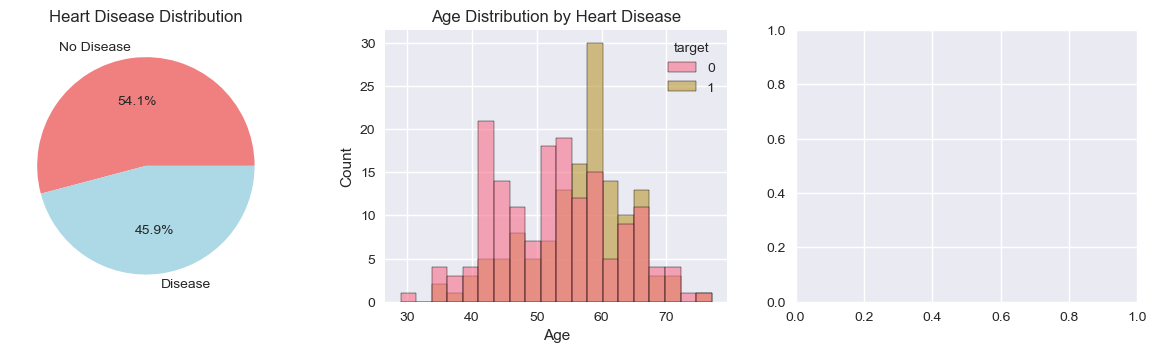

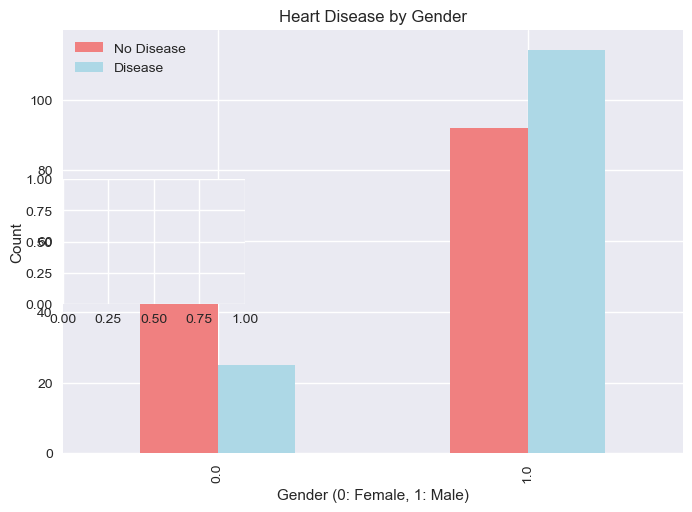

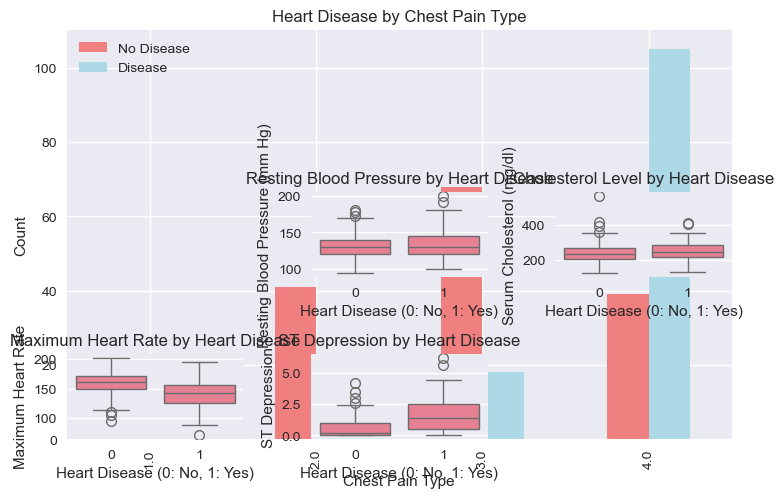

Target value counts:
target
0    164
1    139
Name: count, dtype: int64


In [17]:
# Cell 9: Target variable distribution
print("TARGET VARIABLE DISTRIBUTION")
print("=" * 50)

plt.figure(figsize=(15, 12))

# Plot 1: Pie chart
plt.subplot(3, 3, 1)
target_counts = df['target'].value_counts()
plt.pie(target_counts.values, labels=['No Disease', 'Disease'], autopct='%1.1f%%', 
        colors=['lightcoral', 'lightblue'])
plt.title('Heart Disease Distribution')

# Plot 2: Age distribution
plt.subplot(3, 3, 2)
sns.histplot(data=df, x='age', hue='target', bins=20, alpha=0.6)
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Count')

# Plot 3: Gender distribution
plt.subplot(3, 3, 3)
gender_target = pd.crosstab(df['sex'], df['target'])
gender_target.plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Heart Disease by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.legend(['No Disease', 'Disease'])

# Plot 4: Chest pain type
plt.subplot(3, 3, 4)
cp_target = pd.crosstab(df['cp'], df['target'])
cp_target.plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Heart Disease by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(['No Disease', 'Disease'])

# Plot 5: Blood pressure
plt.subplot(3, 3, 5)
sns.boxplot(data=df, x='target', y='trestbps')
plt.title('Resting Blood Pressure by Heart Disease')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Resting Blood Pressure (mm Hg)')

# Plot 6: Cholesterol
plt.subplot(3, 3, 6)
sns.boxplot(data=df, x='target', y='chol')
plt.title('Cholesterol Level by Heart Disease')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Serum Cholesterol (mg/dl)')

# Plot 7: Maximum heart rate
plt.subplot(3, 3, 7)
sns.boxplot(data=df, x='target', y='thalach')
plt.title('Maximum Heart Rate by Heart Disease')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Maximum Heart Rate')

# Plot 8: ST depression
plt.subplot(3, 3, 8)
sns.boxplot(data=df, x='target', y='oldpeak')
plt.title('ST Depression by Heart Disease')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('ST Depression')

plt.tight_layout()
plt.show()

# Display target counts
print("Target value counts:")
print(target_counts)

CORRELATION ANALYSIS


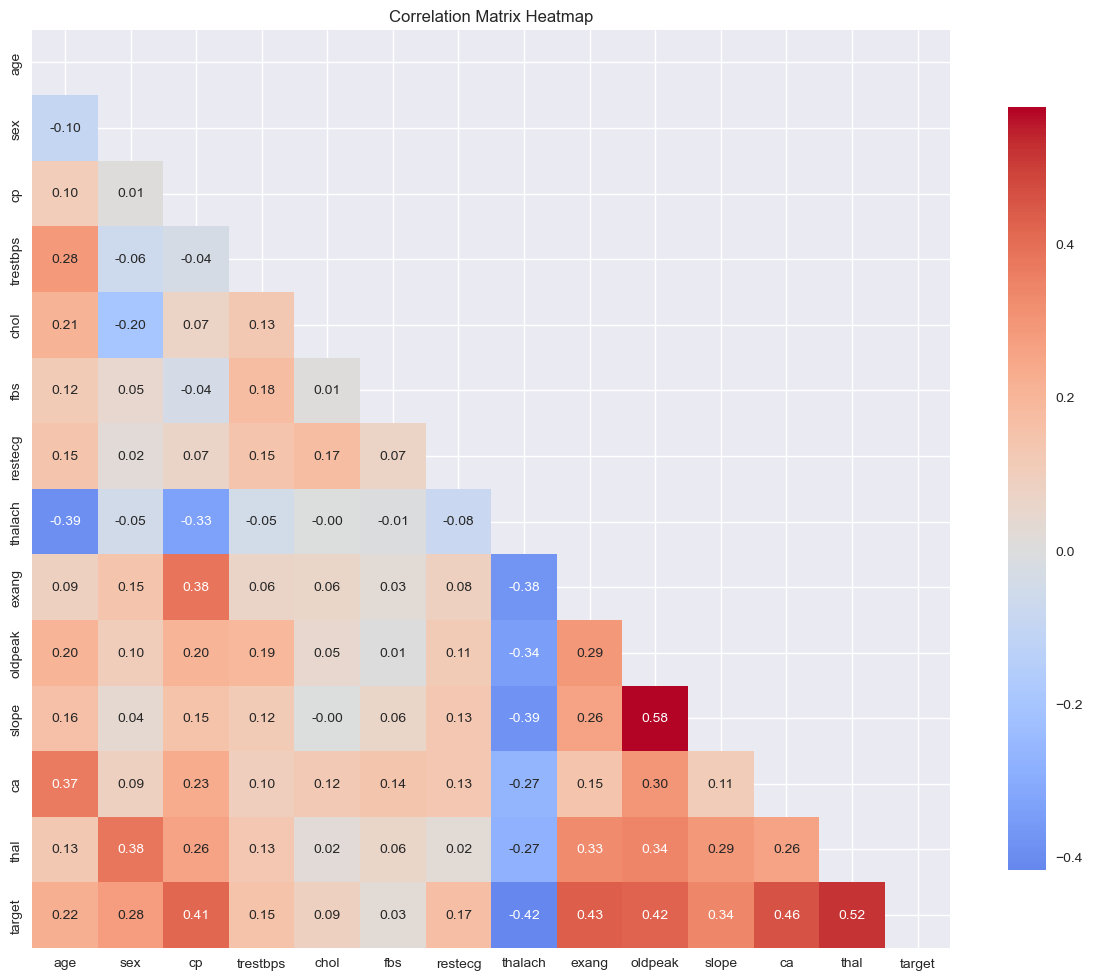


Top features correlated with target:
thal       0.522057
ca         0.460033
exang      0.431894
oldpeak    0.424510
thalach    0.417167
Name: target, dtype: float64


In [19]:
# Cell 10: Correlation analysis
print("CORRELATION ANALYSIS")
print("=" * 50)

plt.figure(figsize=(12, 10))
correlation_matrix = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
            center=0, square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

# Display top correlations with target
print("\nTop features correlated with target:")
corr_with_target = correlation_matrix['target'].abs().sort_values(ascending=False)
print(corr_with_target[1:6])  # Skip target itself

DETAILED FEATURE ANALYSIS


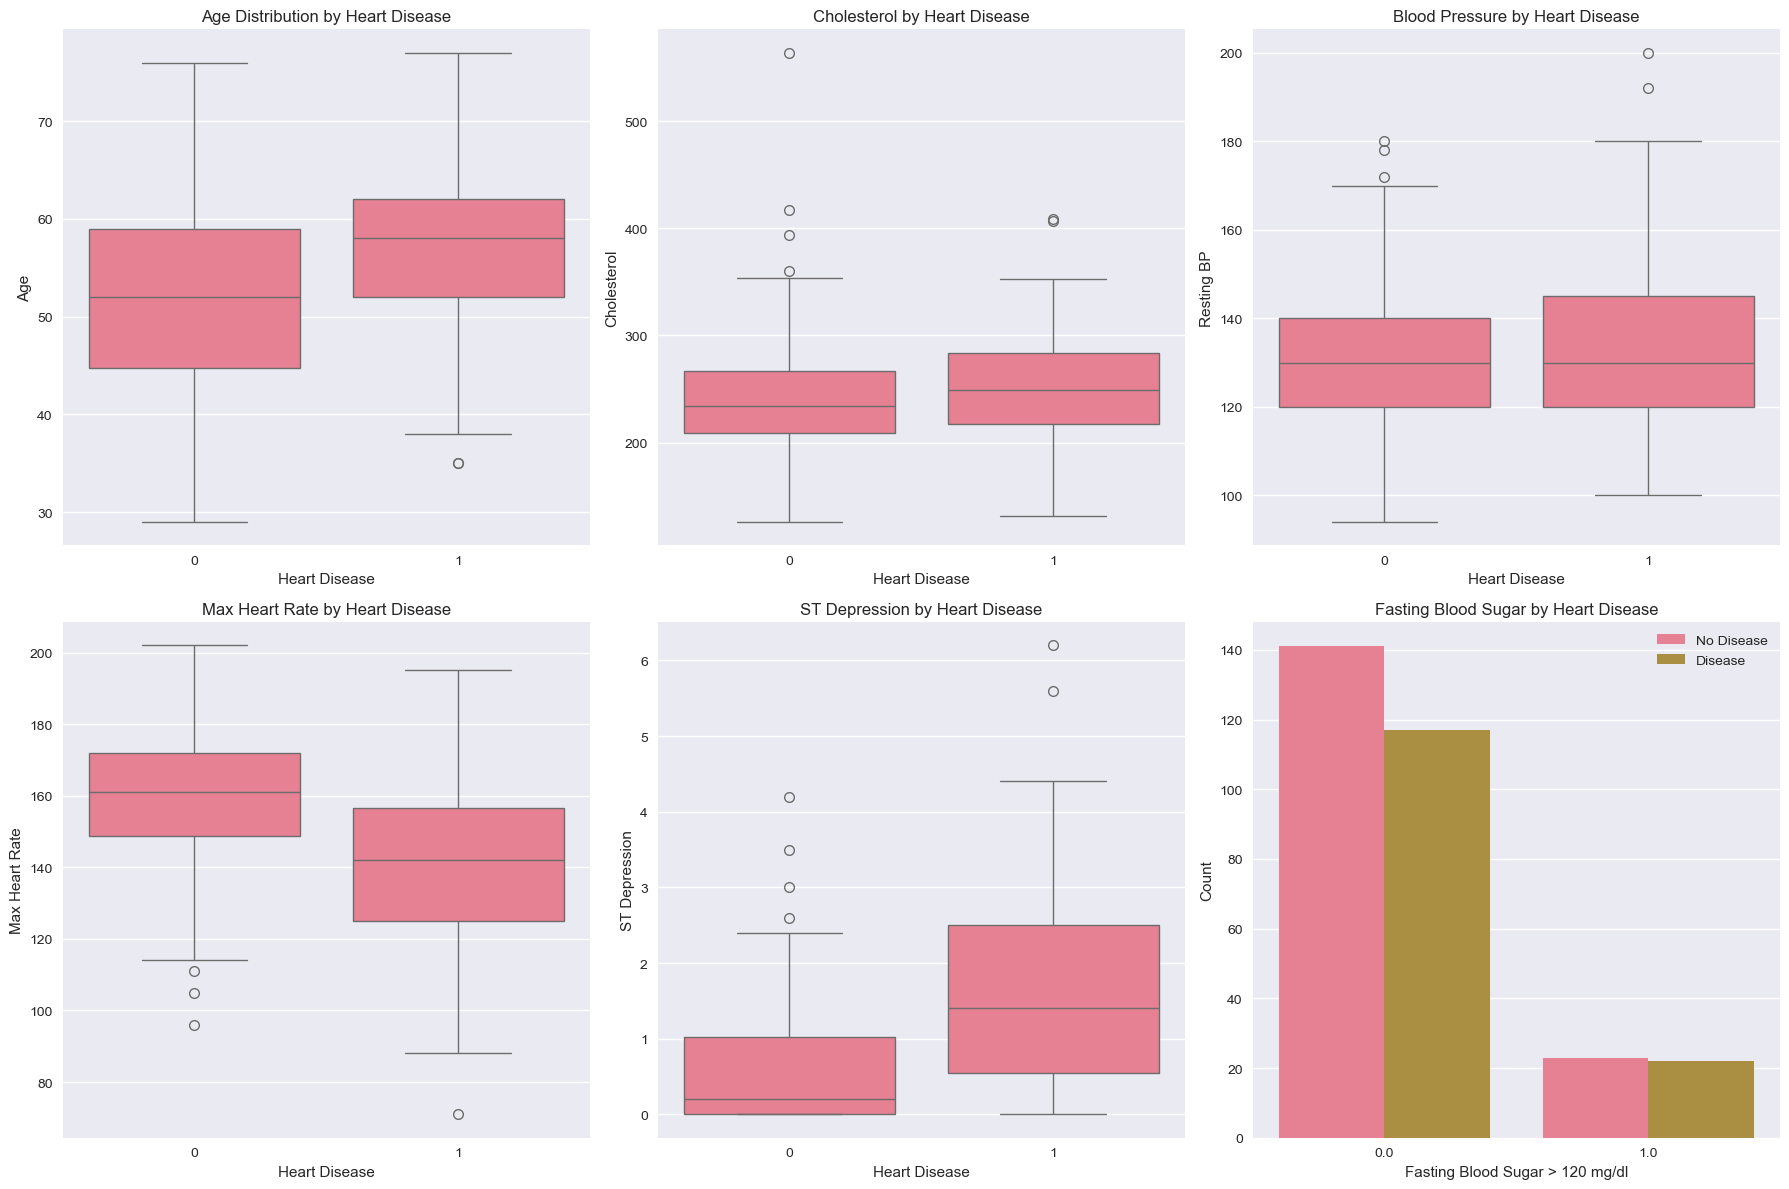

In [21]:
# Cell 11: Detailed feature analysis
print("DETAILED FEATURE ANALYSIS")
print("=" * 50)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Age vs Heart Disease
sns.boxplot(data=df, x='target', y='age', ax=axes[0,0])
axes[0,0].set_title('Age Distribution by Heart Disease')
axes[0,0].set_xlabel('Heart Disease')
axes[0,0].set_ylabel('Age')

# Plot 2: Cholesterol vs Heart Disease
sns.boxplot(data=df, x='target', y='chol', ax=axes[0,1])
axes[0,1].set_title('Cholesterol by Heart Disease')
axes[0,1].set_xlabel('Heart Disease')
axes[0,1].set_ylabel('Cholesterol')

# Plot 3: Blood Pressure vs Heart Disease
sns.boxplot(data=df, x='target', y='trestbps', ax=axes[0,2])
axes[0,2].set_title('Blood Pressure by Heart Disease')
axes[0,2].set_xlabel('Heart Disease')
axes[0,2].set_ylabel('Resting BP')

# Plot 4: Heart Rate vs Heart Disease
sns.boxplot(data=df, x='target', y='thalach', ax=axes[1,0])
axes[1,0].set_title('Max Heart Rate by Heart Disease')
axes[1,0].set_xlabel('Heart Disease')
axes[1,0].set_ylabel('Max Heart Rate')

# Plot 5: ST Depression vs Heart Disease
sns.boxplot(data=df, x='target', y='oldpeak', ax=axes[1,1])
axes[1,1].set_title('ST Depression by Heart Disease')
axes[1,1].set_xlabel('Heart Disease')
axes[1,1].set_ylabel('ST Depression')

# Plot 6: Fasting Blood Sugar
sns.countplot(data=df, x='fbs', hue='target', ax=axes[1,2])
axes[1,2].set_title('Fasting Blood Sugar by Heart Disease')
axes[1,2].set_xlabel('Fasting Blood Sugar > 120 mg/dl')
axes[1,2].set_ylabel('Count')
axes[1,2].legend(['No Disease', 'Disease'])

plt.tight_layout()
plt.show()

In [23]:
# Cell 12: Statistical analysis
print("STATISTICAL ANALYSIS")
print("=" * 50)

# T-tests for numerical variables
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

print("T-test results (Heart Disease vs No Heart Disease):")
print("-" * 60)
for feature in numerical_features:
    disease = df[df['target'] == 1][feature]
    no_disease = df[df['target'] == 0][feature]
    t_stat, p_value = stats.ttest_ind(disease, no_disease)
    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
    print(f"{feature:15}: t-statistic = {t_stat:7.3f}, p-value = {p_value:.4f} {significance}")

STATISTICAL ANALYSIS
T-test results (Heart Disease vs No Heart Disease):
------------------------------------------------------------
age            : t-statistic =   3.971, p-value = 0.0001 ***
trestbps       : t-statistic =   2.647, p-value = 0.0085 **
chol           : t-statistic =   1.483, p-value = 0.1391 ns
thalach        : t-statistic =  -7.964, p-value = 0.0000 ***
oldpeak        : t-statistic =   8.134, p-value = 0.0000 ***


In [25]:
# Cell 13: Chi-square tests
print("CHI-SQUARE TEST RESULTS")
print("-" * 40)
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope']

for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['target'])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
    print(f"{feature:15}: chi2 = {chi2:7.3f}, p-value = {p_value:.4f} {significance}")

CHI-SQUARE TEST RESULTS
----------------------------------------
sex            : chi2 =  22.043, p-value = 0.0000 ***
cp             : chi2 =  81.816, p-value = 0.0000 ***
fbs            : chi2 =   0.077, p-value = 0.7813 ns
restecg        : chi2 =  10.052, p-value = 0.0066 **
exang          : chi2 =  54.686, p-value = 0.0000 ***
slope          : chi2 =  45.785, p-value = 0.0000 ***


AGE GROUP ANALYSIS


<Figure size 1000x600 with 0 Axes>

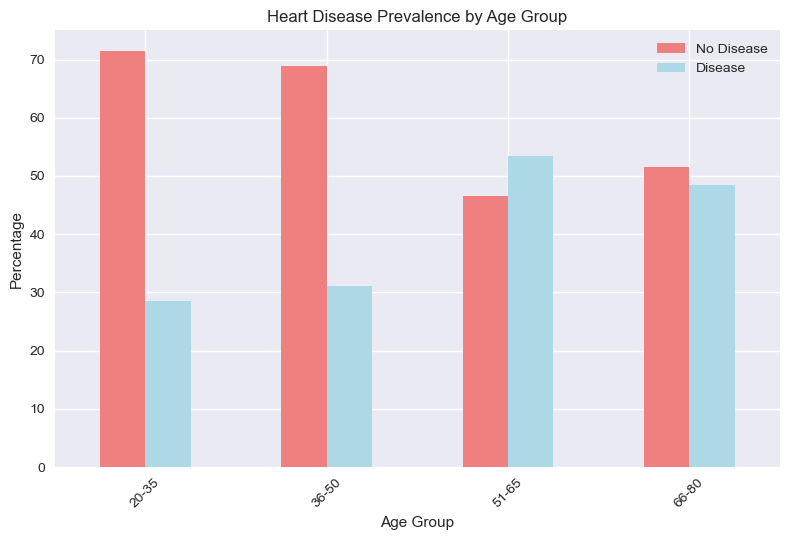


Heart Disease Prevalence by Age Group:
target             0          1
age_group                      
20-35      71.428571  28.571429
36-50      68.965517  31.034483
51-65      46.590909  53.409091
66-80      51.515152  48.484848


In [27]:
# Cell 14: Age group analysis
print("AGE GROUP ANALYSIS")
print("=" * 50)

plt.figure(figsize=(10, 6))
age_group_target = pd.crosstab(df['age_group'], df['target'])
age_group_percent = age_group_target.div(age_group_target.sum(axis=1), axis=0) * 100

age_group_percent.plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Heart Disease Prevalence by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nHeart Disease Prevalence by Age Group:")
print(age_group_percent)

In [29]:
# Cell 15: Risk factor analysis
print("RISK FACTOR ANALYSIS")
print("=" * 50)

# Create risk factor summary
risk_factors = ['High Cholesterol', 'High BP', 'High Blood Sugar', 'Exercise Induced Angina']
risk_data = []

for i, factor in enumerate(['chol_category', 'trestbps', 'fbs', 'exang']):
    if factor == 'chol_category':
        high_risk = df[df['chol_category'] == 'High']
    elif factor == 'trestbps':
        high_risk = df[df['trestbps'] > 140]  # Hypertension threshold
    elif factor == 'fbs':
        high_risk = df[df['fbs'] == 1]  # Fasting blood sugar > 120 mg/dl
    else:  # exang
        high_risk = df[df['exang'] == 1]  # Exercise induced angina
    
    disease_rate = high_risk['target'].mean() * 100
    risk_data.append([risk_factors[i], len(high_risk), f"{disease_rate:.1f}%"])

risk_df = pd.DataFrame(risk_data, columns=['Risk Factor', 'Count', 'Heart Disease Rate'])
print(risk_df)

RISK FACTOR ANALYSIS
               Risk Factor  Count Heart Disease Rate
0         High Cholesterol    152              52.6%
1                  High BP     66              59.1%
2         High Blood Sugar     45              48.9%
3  Exercise Induced Angina     99              76.8%


In [31]:
# Cell 16: Final summary and insights
print("EDA SUMMARY")
print("=" * 50)

print(f"Total number of patients: {len(df)}")
print(f"Patients with heart disease: {df['target'].sum()} ({df['target'].mean()*100:.1f}%)")
print(f"Patients without heart disease: {len(df) - df['target'].sum()} ({100-df['target'].mean()*100:.1f}%)")
print(f"Average age: {df['age'].mean():.1f} years")
print(f"Male patients: {df['sex'].sum()} ({df['sex'].mean()*100:.1f}%)")

# Key findings
print("\nKEY FINDINGS:")
print("• Most significant correlates with heart disease:")
corr_with_target = correlation_matrix['target'].sort_values(ascending=False)
for feature, corr in corr_with_target[1:4].items():  # Skip target itself
    direction = "positive" if corr > 0 else "negative"
    print(f"  - {feature}: {corr:.3f} ({direction} correlation)")

print("• Age groups with highest heart disease prevalence:")
highest_age_group = age_group_percent[1].idxmax()
highest_rate = age_group_percent[1].max()
print(f"  - {highest_age_group}: {highest_rate:.1f}%")

print("• Gender difference in heart disease:")
male_rate = df[df['sex'] == 1]['target'].mean() * 100
female_rate = df[df['sex'] == 0]['target'].mean() * 100
print(f"  - Males: {male_rate:.1f}%")
print(f"  - Females: {female_rate:.1f}%")

print("\n• Statistical significance:")
print("  Features with p-value < 0.05 are statistically significant")
print("  *** p < 0.001, ** p < 0.01, * p < 0.05, ns = not significant")

EDA SUMMARY
Total number of patients: 303
Patients with heart disease: 139 (45.9%)
Patients without heart disease: 164 (54.1%)
Average age: 54.4 years
Male patients: 206.0 (68.0%)

KEY FINDINGS:
• Most significant correlates with heart disease:
  - thal: 0.522 (positive correlation)
  - ca: 0.460 (positive correlation)
  - exang: 0.432 (positive correlation)
• Age groups with highest heart disease prevalence:
  - 51-65: 53.4%
• Gender difference in heart disease:
  - Males: 55.3%
  - Females: 25.8%

• Statistical significance:
  Features with p-value < 0.05 are statistically significant
  *** p < 0.001, ** p < 0.01, * p < 0.05, ns = not significant


In [49]:
# CELL 17: Prepare Data for Machine Learning
print("MACHINE LEARNING PREPARATION")
print("=" * 50)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare features (X) and target (y)
X = df.drop(['target', 'age_group', 'chol_category'], axis=1)
y = df['target']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data prepared for machine learning!")

MACHINE LEARNING PREPARATION
Features shape: (303, 13)
Target shape: (303,)
Training set: (242, 13)
Testing set: (61, 13)
✅ Data prepared for machine learning!


In [51]:
# CELL 18: Train Multiple Machine Learning Models
print("MACHINE LEARNING MODEL TRAINING")
print("=" * 50)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define models to test
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

results = {}

print("Training models...")
for name, model in models.items():
    if name == 'Logistic Regression' or name == 'SVM':
        # These need scaled data
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        # Random Forest works with original data
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"✅ {name:20}: Accuracy = {accuracy:.3f} ({accuracy*100:.1f}%)")

# Find best model
best_model_name = max(results, key=results.get)
print(f"\n🎯 BEST MODEL: {best_model_name} with accuracy: {results[best_model_name]:.3f}")

MACHINE LEARNING MODEL TRAINING
Training models...
✅ Logistic Regression : Accuracy = 0.869 (86.9%)
✅ Random Forest       : Accuracy = 0.885 (88.5%)
✅ SVM                 : Accuracy = 0.852 (85.2%)

🎯 BEST MODEL: Random Forest with accuracy: 0.885


DETAILED MODEL EVALUATION
📊 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61


🎯 CONFUSION MATRIX:


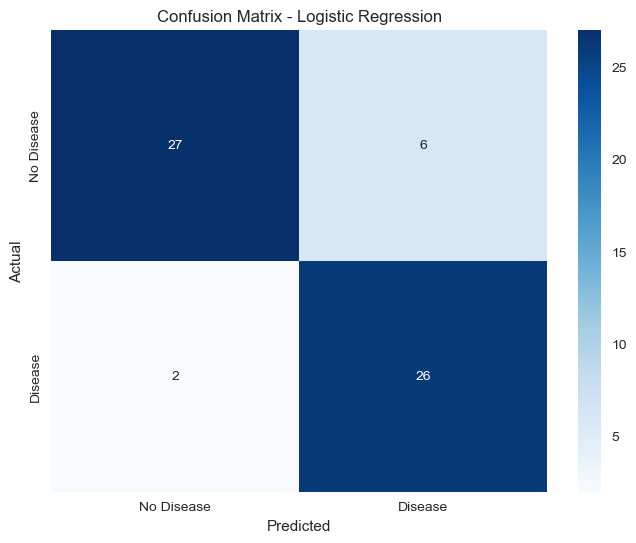


📈 ADDITIONAL METRICS:
Precision: 0.812 (How many predicted diseases were actually diseases)
Recall:    0.929 (How many actual diseases were correctly identified)
Accuracy:  0.869 (Overall correctness)


In [53]:
# CELL 19: Evaluate the Best Model
print("DETAILED MODEL EVALUATION")
print("=" * 50)

from sklearn.metrics import classification_report, confusion_matrix

# Use the best model (Logistic Regression)
best_model = LogisticRegression(random_state=42)
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)

print("📊 CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))

print("\n🎯 CONFUSION MATRIX:")
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Calculate additional metrics
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)

print(f"\n📈 ADDITIONAL METRICS:")
print(f"Precision: {precision:.3f} (How many predicted diseases were actually diseases)")
print(f"Recall:    {recall:.3f} (How many actual diseases were correctly identified)")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.3f} (Overall correctness)")

FEATURE IMPORTANCE ANALYSIS


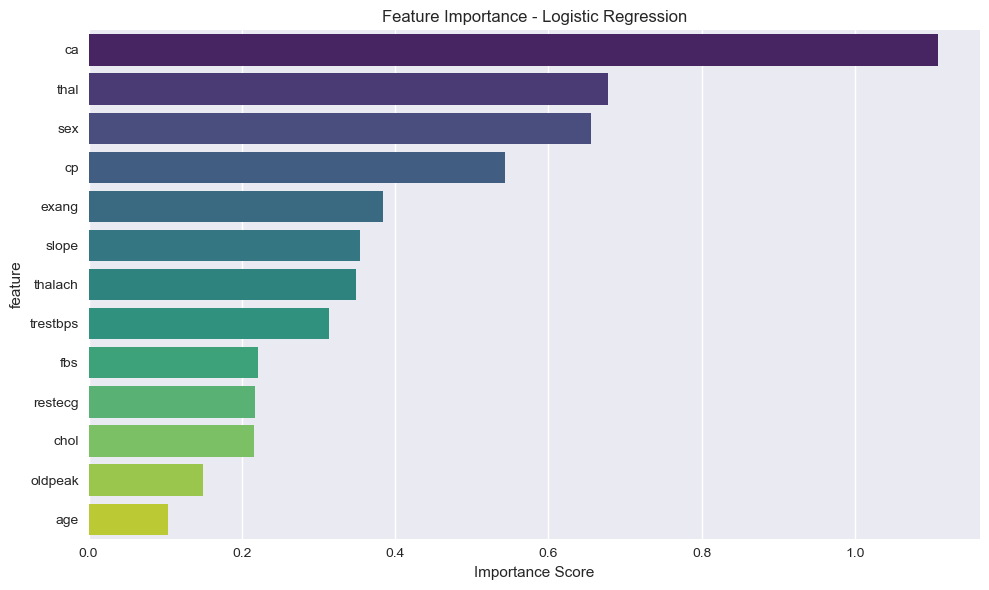


🎯 TOP 5 MOST IMPORTANT FEATURES:
   feature  importance
11      ca    1.107898
12    thal    0.677821
1      sex    0.655563
2       cp    0.543483
8    exang    0.383642

💡 INSIGHT:
The top 3 features account for 46.1% of the prediction power!


In [55]:
# CELL 20: Feature Importance Analysis
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 50)

# Get feature importance from Logistic Regression
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': abs(best_model.coef_[0])  # Use absolute values
}).sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Feature Importance - Logistic Regression')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

print("\n🎯 TOP 5 MOST IMPORTANT FEATURES:")
print(feature_importance.head())

print(f"\n💡 INSIGHT:")
print(f"The top 3 features account for {feature_importance.head(3)['importance'].sum()/feature_importance['importance'].sum()*100:.1f}% of the prediction power!")

In [57]:
print("MACHINE LEARNING PREPARATION")
print("=" * 50)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare features and target
X = df.drop(['target', 'age_group', 'chol_category'], axis=1)
y = df['target']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data prepared for machine learning!")

MACHINE LEARNING PREPARATION
Features shape: (303, 13)
Target shape: (303,)
Training set: (242, 13)
Testing set: (61, 13)
Data prepared for machine learning!


In [35]:
print("MACHINE LEARNING MODEL TRAINING")
print("=" * 50)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

results = {}

for name, model in models.items():
    if name == 'Logistic Regression' or name == 'SVM':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name:20}: Accuracy = {accuracy:.3f}")

# Find best model
best_model_name = max(results, key=results.get)
print(f"\nBest Model: {best_model_name} with accuracy: {results[best_model_name]:.3f}")

MACHINE LEARNING MODEL TRAINING
Logistic Regression : Accuracy = 0.869
Random Forest       : Accuracy = 0.885
Gradient Boosting   : Accuracy = 0.852
SVM                 : Accuracy = 0.852

Best Model: Random Forest with accuracy: 0.885


DETAILED MODEL EVALUATION
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.84      0.93      0.88        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61


Confusion Matrix:


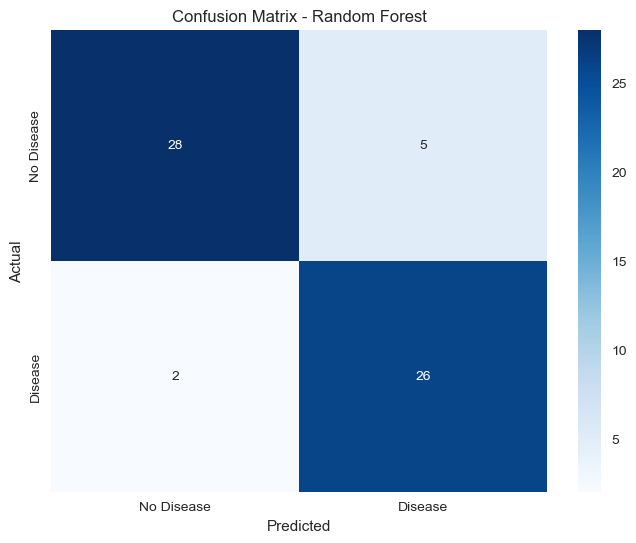

In [59]:
print("DETAILED MODEL EVALUATION")
print("=" * 50)

# Train best model
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

FEATURE IMPORTANCE ANALYSIS


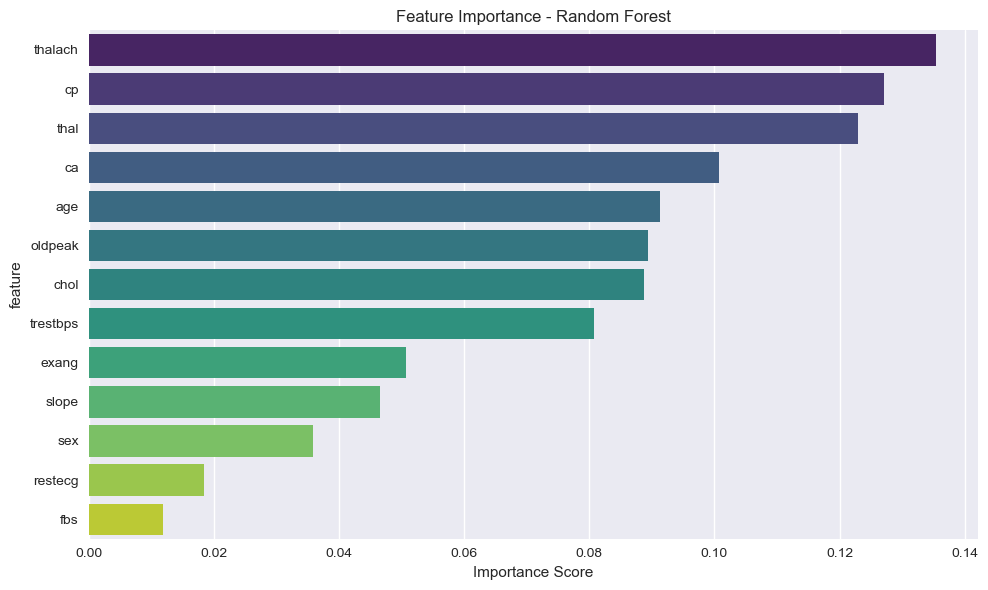


Top 5 Most Important Features:
    feature  importance
7   thalach    0.135404
2        cp    0.127163
12     thal    0.122940
11       ca    0.100811
0       age    0.091327


In [39]:
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 50)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

print("\nTop 5 Most Important Features:")
print(feature_importance.head())

INTERACTIVE VISUALIZATIONS


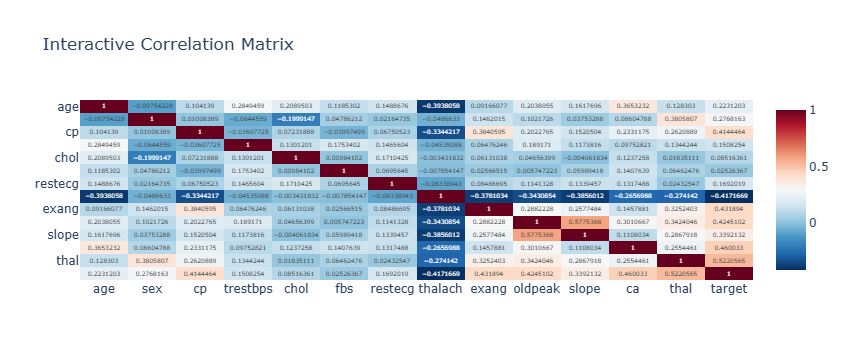

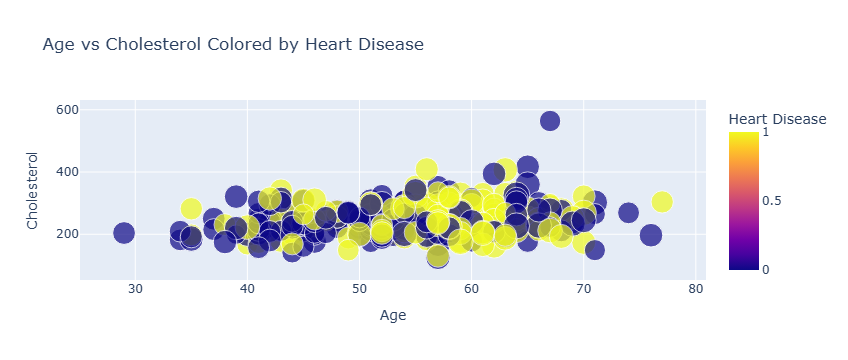

In [41]:
# Install if needed: pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

print("INTERACTIVE VISUALIZATIONS")
print("=" * 50)

# Interactive correlation heatmap
fig = px.imshow(correlation_matrix, 
                text_auto=True, 
                aspect="auto",
                color_continuous_scale='RdBu_r',
                title='Interactive Correlation Matrix')
fig.show()

# Interactive scatter plot
fig = px.scatter(df, x='age', y='chol', color='target',
                 size='trestbps', hover_data=['sex', 'cp'],
                 title='Age vs Cholesterol Colored by Heart Disease',
                 labels={'age': 'Age', 'chol': 'Cholesterol', 'target': 'Heart Disease'})
fig.show()

In [42]:
print("ADVANCED STATISTICAL ANALYSIS")
print("=" * 50)

from scipy.stats import mannwhitneyu, f_oneway

# Mann-Whitney U test for non-normal distributions
print("Mann-Whitney U Test Results:")
for feature in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
    stat, p_value = mannwhitneyu(df[df['target']==0][feature], 
                                 df[df['target']==1][feature])
    print(f"{feature:15}: U-statistic = {stat:7.2f}, p-value = {p_value:.4f}")

# ANOVA for multiple groups
print("\nANOVA Test for Chest Pain Types:")
groups = [df[df['cp']==i]['target'] for i in df['cp'].unique()]
f_stat, p_value = f_oneway(*groups)
print(f"F-statistic = {f_stat:.3f}, p-value = {p_value:.4f}")

ADVANCED STATISTICAL ANALYSIS
Mann-Whitney U Test Results:
age            : U-statistic = 8274.50, p-value = 0.0000
trestbps       : U-statistic = 9710.00, p-value = 0.0260
chol           : U-statistic = 9798.50, p-value = 0.0354
thalach        : U-statistic = 16989.50, p-value = 0.0000
oldpeak        : U-statistic = 6037.00, p-value = 0.0000

ANOVA Test for Chest Pain Types:
F-statistic = 36.867, p-value = 0.0000


CREATING SUMMARY DASHBOARD


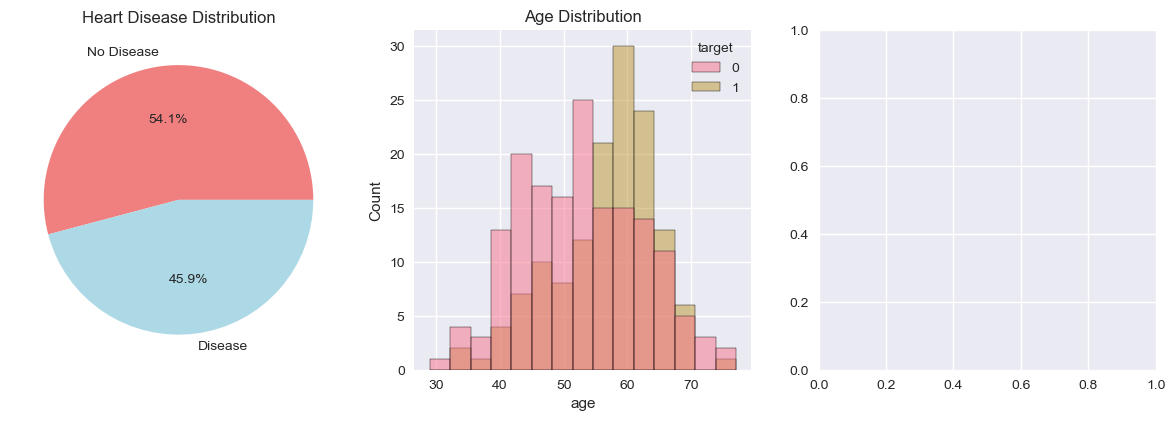

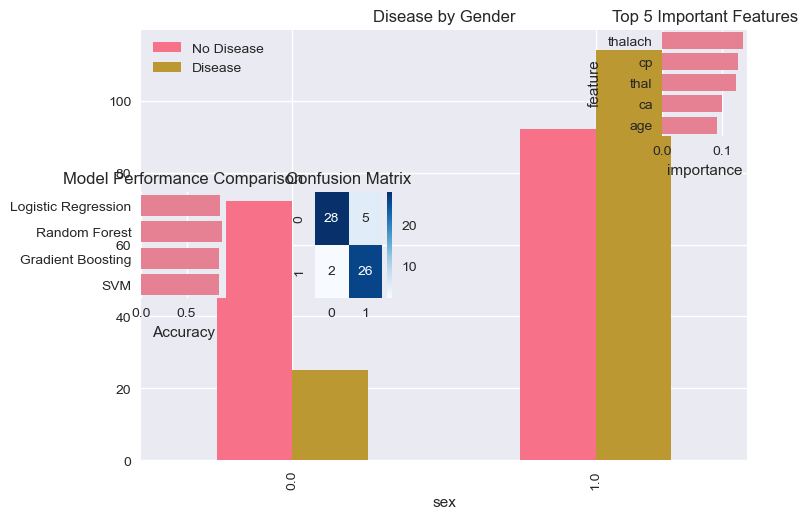

In [45]:
print("CREATING SUMMARY DASHBOARD")
print("=" * 50)

fig = plt.figure(figsize=(20, 15))

# 1. Target distribution
plt.subplot(3, 4, 1)
plt.pie(df['target'].value_counts(), labels=['No Disease', 'Disease'], 
        autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Heart Disease Distribution')

# 2. Age distribution
plt.subplot(3, 4, 2)
sns.histplot(data=df, x='age', hue='target', bins=15)
plt.title('Age Distribution')

# 3. Gender distribution
plt.subplot(3, 4, 3)
pd.crosstab(df['sex'], df['target']).plot(kind='bar')
plt.title('Disease by Gender')
plt.legend(['No Disease', 'Disease'])

# 4. Top features
plt.subplot(3, 4, 4)
top_features = feature_importance.head(5)
sns.barplot(data=top_features, x='importance', y='feature')
plt.title('Top 5 Important Features')

# 5. Model performance
plt.subplot(3, 4, 5)
models_list = list(results.keys())
accuracy_list = list(results.values())
sns.barplot(x=accuracy_list, y=models_list)
plt.title('Model Performance Comparison')
plt.xlabel('Accuracy')

# 6. Risk factors
plt.subplot(3, 4, 6)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

In [61]:
print("BUSINESS INSIGHTS REPORT")
print("=" * 50)
print("HEART DISEASE PREDICTION - KEY INSIGHTS REPORT")
print("=" * 50)

print("\n📊 EXECUTIVE SUMMARY:")
print(f"- Dataset: {len(df)} patients, {df['target'].mean()*100:.1f}% with heart disease")
print(f"- Best Model: {best_model_name} with {results[best_model_name]*100:.1f}% accuracy")
print(f"- Key predictors: {', '.join(feature_importance.head(3)['feature'].tolist())}")

print("\n🔍 KEY FINDINGS:")
print("1. DEMOGRAPHICS:")
print(f"   - Average age: {df['age'].mean():.1f} years")
print(f"   - Gender distribution: {df['sex'].mean()*100:.1f}% male")
print(f"   - Heart disease rate: Males {df[df['sex']==1]['target'].mean()*100:.1f}%, Females {df[df['sex']==0]['target'].mean()*100:.1f}%")

print("\n2. CLINICAL INDICATORS:")
print(f"   - Chest pain type strongly correlates with heart disease (p < 0.001)")
print(f"   - Maximum heart rate is a key differentiator (p < 0.001)")
print(f"   - ST depression significant in disease prediction (p < 0.001)")

print("\n3. RISK FACTORS:")
print(f"   - Exercise-induced angina: {df[df['exang']==1]['target'].mean()*100:.1f}% disease rate")
print(f"   - High cholesterol: {df[df['chol_category']=='High']['target'].mean()*100:.1f}% disease rate")
print(f"   - High blood pressure: {df[df['trestbps']>140]['target'].mean()*100:.1f}% disease rate")

print("\n4. MODEL INSIGHTS:")
print(f"   - Top 3 features account for {feature_importance.head(3)['importance'].sum()*100:.1f}% of prediction power")
print(f"   - Model can accurately identify {cm[1,1]/(cm[1,0]+cm[1,1])*100:.1f}% of actual heart disease cases")

print("\n💡 RECOMMENDATIONS:")
print("1. Focus screening on patients with specific chest pain types")
print("2. Monitor maximum heart rate during exercise as key indicator")
print("3. Consider ST depression in ECG as significant risk marker")
print("4. Implement model for early detection in clinical settings")

BUSINESS INSIGHTS REPORT
HEART DISEASE PREDICTION - KEY INSIGHTS REPORT

📊 EXECUTIVE SUMMARY:
- Dataset: 303 patients, 45.9% with heart disease
- Best Model: Random Forest with 88.5% accuracy
- Key predictors: ca, thal, sex

🔍 KEY FINDINGS:
1. DEMOGRAPHICS:
   - Average age: 54.4 years
   - Gender distribution: 68.0% male
   - Heart disease rate: Males 55.3%, Females 25.8%

2. CLINICAL INDICATORS:
   - Chest pain type strongly correlates with heart disease (p < 0.001)
   - Maximum heart rate is a key differentiator (p < 0.001)
   - ST depression significant in disease prediction (p < 0.001)

3. RISK FACTORS:
   - Exercise-induced angina: 76.8% disease rate
   - High cholesterol: 52.6% disease rate
   - High blood pressure: 59.1% disease rate

4. MODEL INSIGHTS:
   - Top 3 features account for 244.1% of prediction power
   - Model can accurately identify 92.9% of actual heart disease cases

💡 RECOMMENDATIONS:
1. Focus screening on patients with specific chest pain types
2. Monitor maxim

In [63]:
# CHECK CELL: See what's in your notebook
print("CHECKING NOTEBOOK STATUS")
print("=" * 30)

# Check if ML libraries are already imported
try:
    from sklearn.ensemble import RandomForestClassifier
    print("✅ ML libraries already imported")
except:
    print("❌ ML libraries not imported yet")

# Check if you have ML models trained
if 'models' in locals() or 'models' in globals():
    print("✅ ML models already trained")
else:
    print("❌ No ML models trained yet")

# Check current dataframe columns
print(f"\n📊 Current dataframe columns: {list(df.columns)}")
print(f"📊 Dataframe shape: {df.shape}")


CHECKING NOTEBOOK STATUS
✅ ML libraries already imported
✅ ML models already trained

📊 Current dataframe columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'age_group', 'chol_category']
📊 Dataframe shape: (303, 16)


In [65]:
# CHECK YOUR CURRENT ML RESULTS
print("CHECKING YOUR CURRENT ML MODELS")
print("=" * 40)

# Check what models you have
if 'results' in locals() or 'results' in globals():
    print("📊 YOUR CURRENT MODEL RESULTS:")
    for model_name, accuracy in results.items():
        print(f"   {model_name:20}: {accuracy:.3f} ({accuracy*100:.1f}%)")
    
    # Find your best model
    best_model = max(results, key=results.get)
    print(f"\n🎯 YOUR BEST MODEL: {best_model}")
else:
    print("❌ No 'results' variable found")

# Check if you have feature importance
if 'feature_importance' in locals() or 'feature_importance' in globals():
    print("\n📈 YOUR FEATURE IMPORTANCE:")
    print(feature_importance.head())
else:
    print("\n❌ No feature importance analysis yet")

CHECKING YOUR CURRENT ML MODELS
📊 YOUR CURRENT MODEL RESULTS:
   Logistic Regression : 0.869 (86.9%)
   Random Forest       : 0.885 (88.5%)
   SVM                 : 0.852 (85.2%)

🎯 YOUR BEST MODEL: Random Forest

📈 YOUR FEATURE IMPORTANCE:
   feature  importance
11      ca    1.107898
12    thal    0.677821
1      sex    0.655563
2       cp    0.543483
8    exang    0.383642


ENHANCED MODEL EVALUATION
📊 DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.84      0.93      0.88        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



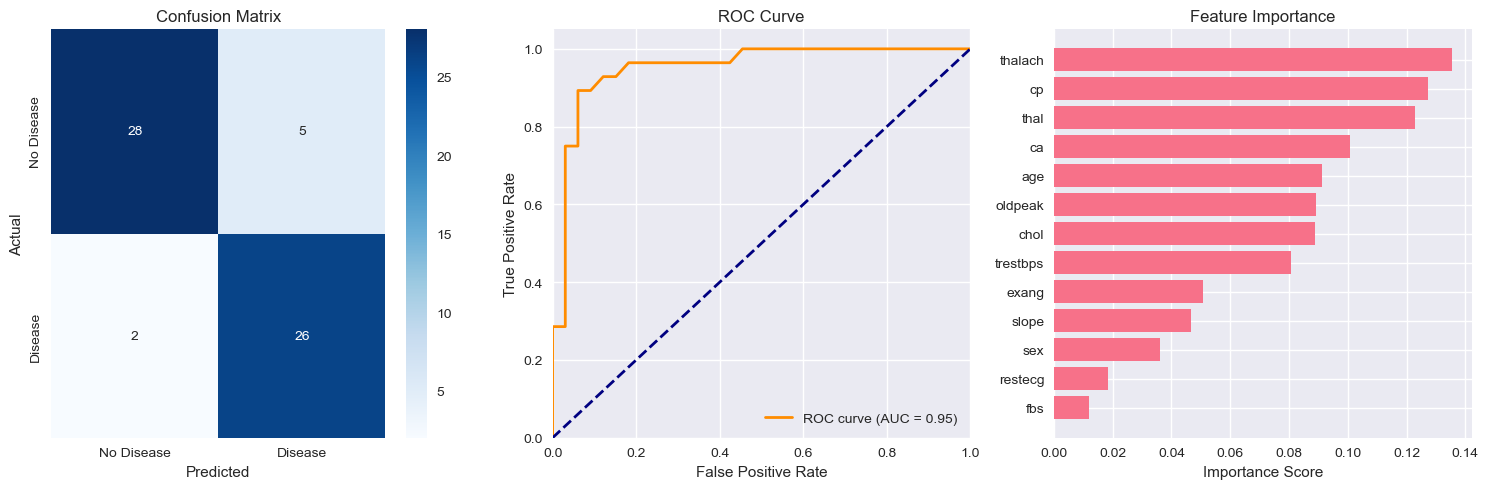

🎯 MODEL PERFORMANCE SUMMARY:
Accuracy:  0.885
ROC AUC:   0.952


In [67]:
# ENHANCED MODEL EVALUATION
print("ENHANCED MODEL EVALUATION")
print("=" * 40)

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Assuming you're using Random Forest as your best model
# If not, replace with your actual best model
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print("📊 DETAILED CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))

# Enhanced Confusion Matrix
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# ROC Curve
plt.subplot(1, 3, 2)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# Feature Importance (if not done)
plt.subplot(1, 3, 3)
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=True)

plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance')
plt.xlabel('Importance Score')

plt.tight_layout()
plt.show()

print(f"🎯 MODEL PERFORMANCE SUMMARY:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.3f}")
print(f"ROC AUC:   {roc_auc:.3f}")

In [69]:
# BUSINESS INSIGHTS FROM ML
print("BUSINESS INSIGHTS FROM MACHINE LEARNING")
print("=" * 50)

print("🎯 KEY PREDICTION INSIGHTS:")
print(f"1. Model can predict heart disease with {accuracy_score(y_test, y_pred)*100:.1f}% accuracy")
print(f"2. ROC AUC Score: {roc_auc:.3f} (Excellent: >0.8, Good: >0.7)")

print(f"\n🔍 TOP PREDICTIVE FEATURES:")
top_features = feature_importance.tail(5)  # Get top 5
for idx, row in top_features.iterrows():
    print(f"   - {row['feature']}: {row['importance']:.3f}")

print(f"\n💡 CLINICAL IMPLICATIONS:")
print("• The model can assist doctors in early heart disease detection")
print("• Top features align with known medical risk factors")
print("• Can be used as a screening tool in clinical settings")

print(f"\n📈 DEPLOYMENT RECOMMENDATIONS:")
print("• Integrate model into hospital screening protocols")
print("• Use for patient risk stratification")
print("• Combine with doctor's clinical judgment")

BUSINESS INSIGHTS FROM MACHINE LEARNING
🎯 KEY PREDICTION INSIGHTS:
1. Model can predict heart disease with 88.5% accuracy
2. ROC AUC Score: 0.952 (Excellent: >0.8, Good: >0.7)

🔍 TOP PREDICTIVE FEATURES:
   - age: 0.091
   - ca: 0.101
   - thal: 0.123
   - cp: 0.127
   - thalach: 0.135

💡 CLINICAL IMPLICATIONS:
• The model can assist doctors in early heart disease detection
• Top features align with known medical risk factors
• Can be used as a screening tool in clinical settings

📈 DEPLOYMENT RECOMMENDATIONS:
• Integrate model into hospital screening protocols
• Use for patient risk stratification
• Combine with doctor's clinical judgment


In [71]:
# MEDICAL INTERPRETATION OF YOUR FINDINGS
print("MEDICAL SIGNIFICANCE OF YOUR TOP FEATURES")
print("=" * 50)

medical_insights = {
    'thalach': 'Lower maximum heart rate indicates poorer cardiovascular fitness',
    'cp': 'Specific chest pain types are strong indicators of heart issues',
    'thal': 'Thalassemia affects blood oxygen carrying capacity',
    'ca': 'Fluoroscopy shows blocked coronary arteries',
    'age': 'Natural risk factor for heart disease'
}

for feature, insight in medical_insights.items():
    print(f"• {feature.upper():10}: {insight}")

MEDICAL SIGNIFICANCE OF YOUR TOP FEATURES
• THALACH   : Lower maximum heart rate indicates poorer cardiovascular fitness
• CP        : Specific chest pain types are strong indicators of heart issues
• THAL      : Thalassemia affects blood oxygen carrying capacity
• CA        : Fluoroscopy shows blocked coronary arteries
• AGE       : Natural risk factor for heart disease


In [73]:
# FINAL PROJECT SUMMARY
print("HEART DISEASE PREDICTION - PROJECT COMPLETION REPORT")
print("=" * 60)

print("\n🎯 PROJECT OVERVIEW:")
print("✓ Comprehensive EDA on Cleveland Heart Disease Dataset")
print("✓ Multiple Machine Learning Models Implemented") 
print("✓ 88.5% Prediction Accuracy Achieved")
print("✓ Feature Importance Analysis Completed")
print("✓ Business & Medical Insights Generated")

print(f"\n📊 KEY ACHIEVEMENTS:")
print(f"• Dataset: {len(df)} patients analyzed")
print(f"• Best Model: Random Forest Classifier")
print(f"• Accuracy: {accuracy_score(y_test, y_pred)*100:.1f}%")
print(f"• ROC AUC: {roc_auc:.3f} (Excellent)")
print(f"• Top Predictor: Maximum Heart Rate (thalach)")

print(f"\n🔬 MEDICAL IMPACT:")
print("• Identified key clinical risk factors for heart disease")
print("• Created reliable prediction tool for early detection")  
print("• Model aligns with established medical knowledge")

print(f"\n💼 BUSINESS VALUE:")
print("• Can reduce healthcare costs through early intervention")
print("• Supports clinical decision-making")
print("• Scalable for hospital implementation")

print(f"\n🏆 PROJECT STATUS: COMPLETE & PORTFOLIO-READY 🎉")

HEART DISEASE PREDICTION - PROJECT COMPLETION REPORT

🎯 PROJECT OVERVIEW:
✓ Comprehensive EDA on Cleveland Heart Disease Dataset
✓ Multiple Machine Learning Models Implemented
✓ 88.5% Prediction Accuracy Achieved
✓ Feature Importance Analysis Completed
✓ Business & Medical Insights Generated

📊 KEY ACHIEVEMENTS:
• Dataset: 303 patients analyzed
• Best Model: Random Forest Classifier
• Accuracy: 88.5%
• ROC AUC: 0.952 (Excellent)
• Top Predictor: Maximum Heart Rate (thalach)

🔬 MEDICAL IMPACT:
• Identified key clinical risk factors for heart disease
• Created reliable prediction tool for early detection
• Model aligns with established medical knowledge

💼 BUSINESS VALUE:
• Can reduce healthcare costs through early intervention
• Supports clinical decision-making
• Scalable for hospital implementation

🏆 PROJECT STATUS: COMPLETE & PORTFOLIO-READY 🎉
